<h1><b>The Law of Large Numbers</b></h1>

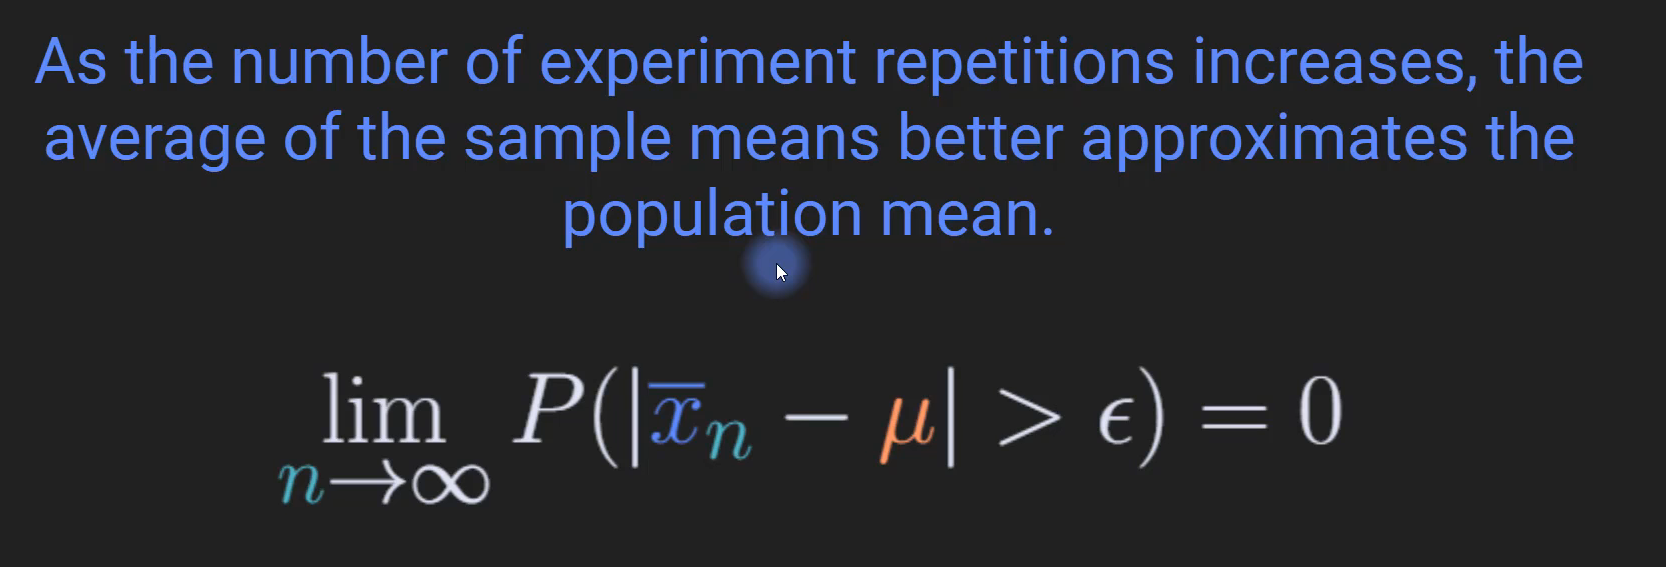

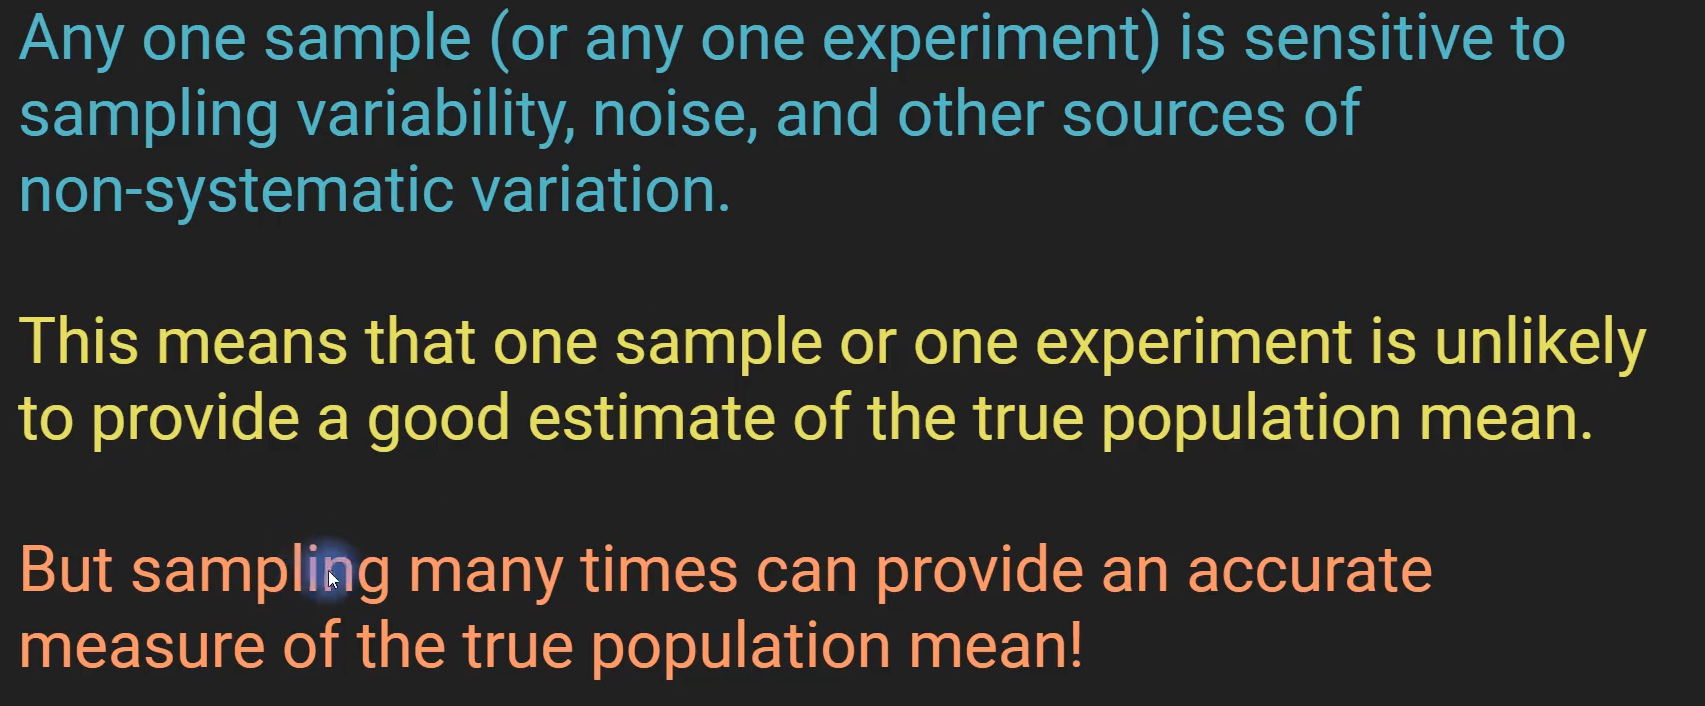

<h4>Generating a population of random numbers</h4>

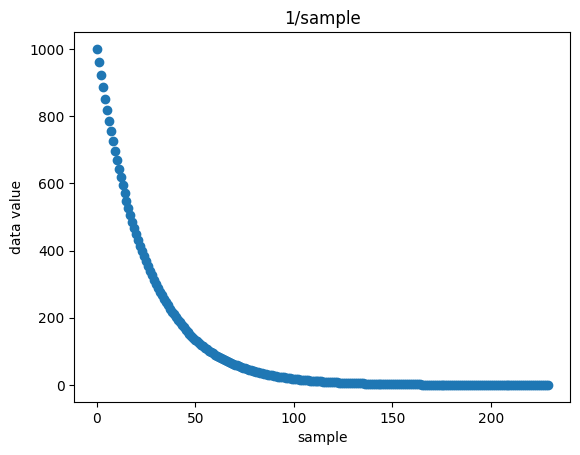

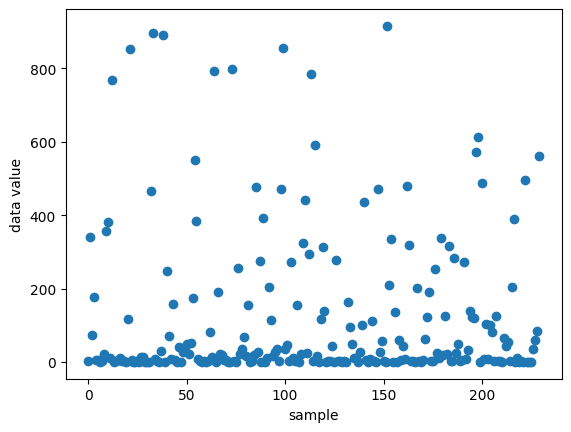

In [1]:
import numpy as np
import matplotlib.pyplot as plt

population_size = int(2.3e5)
skip = int(1.0e3)

# using linspace here would make the numbers become very small quickly
# to avoid that we can use logspace
# Return numbers spaced evenly on a log scale.
# In linear space, the sequence starts at base ** start (base to the power of start) and ends with base ** stop
# To put it in other words, logspace returns logarithmically spaced n numbers between 
pop = 1/np.logspace(np.log10(.001), np.log10(10), population_size)
# plt.plot(1/f)
plt.plot(pop[::skip], 'o')
plt.xlabel('sample')
plt.ylabel('data value')
plt.title('1/sample')
plt.show()

# Shuffling the values
# np.random.shuffle shuffles an array in place
# it samples without replacement
np.random.shuffle(pop)
plt.plot(pop[::skip], 'o')
plt.xlabel('sample')
plt.ylabel('data value')
plt.show()

<h4>Monte Carlo sampling</h4>
Randomly sampling from a population.

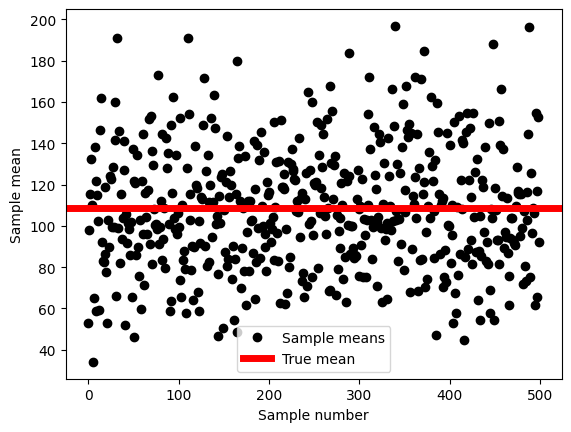

In [2]:
# picking a sample and calculating its average 500 times
n_samples = 500
one_sample = 50

# np.random.choice samples with replacement
samples_mean = [ np.mean(np.random.choice(pop, one_sample)) for i in range(n_samples)]
pop_mean = np.mean(pop)
plt.plot(samples_mean, 'ko', label="Sample means")
plt.axhline(y=pop_mean, color='r', linewidth=5, label='True mean')
plt.xlabel('Sample number')
plt.ylabel('Sample mean')
plt.legend()
plt.show()

What can we see from this plot is that individual samples <b>are not reliable</b>.<br>
We cannot trust individual sample means because the variability is too high.<br>
The law of large numbers tells us that averaging this whole cloud of black dots together is going to be really close to the true mean (red line).<br>
<b>The more of samples</b> we average together, <b>the closer to the population mean</b> we're going to get.<br>
The sample size does not matter here.

<h4>Cumulative average</h4>
Averaging all of the sample means.

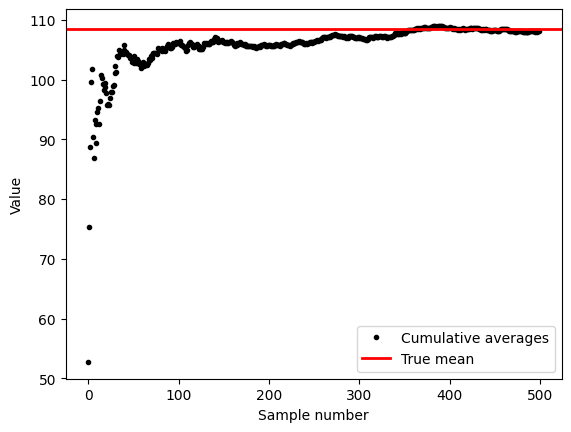

In [3]:
means = [np.mean(samples_mean[:i+1]) for i in range(len(samples_mean))] 
cumave = np.zeros(n_samples)
for i in range(n_samples):
    cumave[i] = np.mean(samples_mean[:i+1])
# cumwave and means are the same

plt.plot(means, 'ko', label="Cumulative averages", markersize=3)
plt.axhline(y=pop_mean, color='r', linewidth=2, label='True mean')
plt.xlabel('Sample number')
plt.ylabel('Value')
plt.legend()
plt.show()

We do not care whether the divergence from the true mean is positive or negative.<br>We take into account only the magnitude of the divergence.

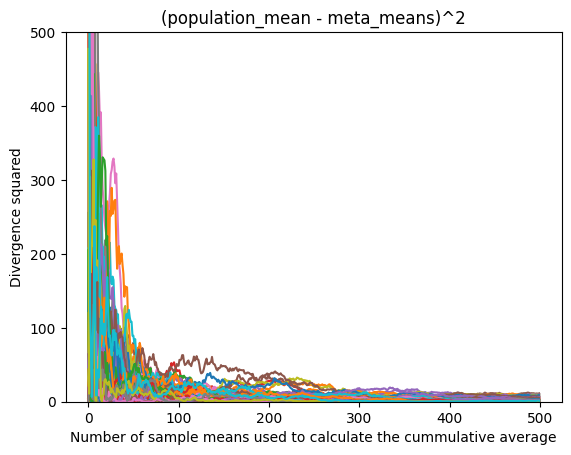

In [4]:
number_of_meta_samples = 100
matrix = np.zeros((number_of_meta_samples, n_samples))
allsamplemeans = np.zeros((number_of_meta_samples, n_samples))

for j in range(number_of_meta_samples):
    s_meta_means = [ np.mean(np.random.choice(pop, one_sample)) for i in range(n_samples)]
    meta_means = [np.mean(s_meta_means[0:i+1]) for i in range(len(s_meta_means))] 
    # cumave = np.cumsum(samples_mean) / np.arange(1, number_of_samples)
    divergence_square = (pop_mean - meta_means)**2
    matrix[j,:] = divergence_square
    # storing all the samplemeans
    allsamplemeans[j,:] = s_meta_means
    
# we have to transpose the matrix to plot it the correct way
plt.plot(matrix.T)
plt.ylim([0,500])
plt.ylabel("Divergence squared")
plt.xlabel("Number of sample means used to calculate the cumulative average")
plt.title("(population_mean - meta_means)^2")
plt.show()

Corollary is as follows: the more samples average we average, the closer to the population mean we get.

<h1><b>The Central Limit Theorem</b></h1>

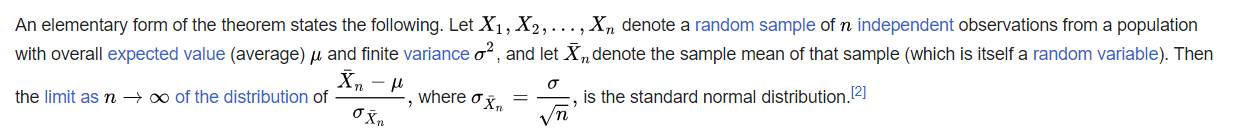

It establishes that, in many situations, for independent and indentically disributed random variables, the sampling distribution of the standarized sample mean tends towards the standard normal distribution, even if the original variables themselves are not normally distributed.

In other words, suppose that a large sample of observations is obtained, each observation being randomly produced in a way that does not depend on the values of the other observations, and that the average (airthmetic mean) of the observed values is computed. If this procedure is performed many times, resulting in a collection of observed averages, the central limit theorem says that if the sample size was large enough, the probability distribution of these averages will closely approximate a normal distribution.

<h4>Plotting a histogram of a sample mean for one sampling</h4>

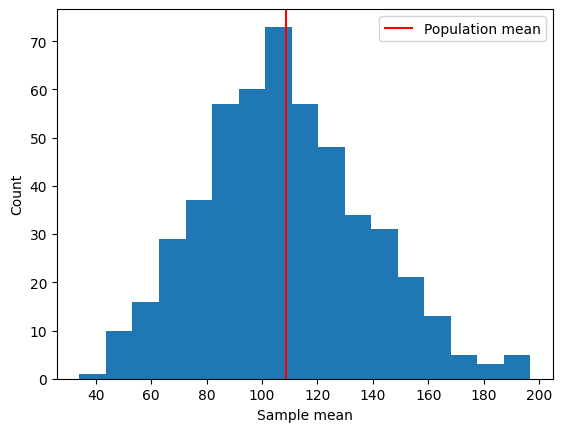

In [5]:
plt.hist(samples_mean, bins='fd') # using Friedman-Diaconis algorithm to calculate the proper number of bins
plt.axvline(x = pop_mean, color = 'r', label = 'Population mean')
plt.xlabel("Sample mean")
plt.ylabel("Count")
plt.legend()
plt.show()

As we can see from the plot, the histogram is approaching the Gaussian distribution even though the population distribution is not Gaussian.

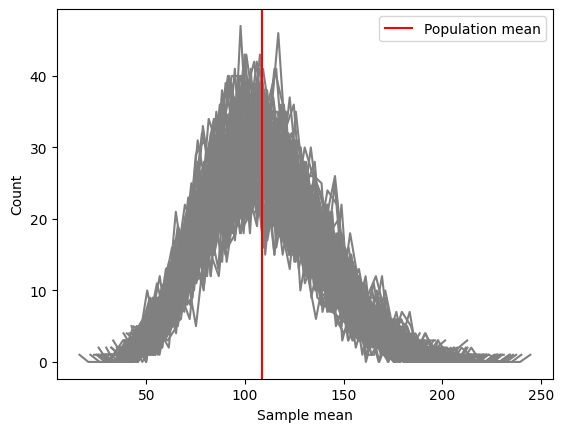

In [6]:
nbins = 40

for i in range(number_of_meta_samples):
    # y - heights of the bins, x - boundaries of bins, thats why x=y+1
    y,x = np.histogram(allsamplemeans[i,:],bins=nbins)
    # in order to make x the same size as y, we calculate the middle of each bin
    x = (x[1:]+x[:-1])/2
    plt.plot(x,y,'gray')

plt.axvline(x = pop_mean, color = 'r', label = 'Population mean')
plt.xlabel("Sample mean")
plt.ylabel("Count")
plt.legend()
plt.show()

As we can see, the plot resembles the shape of the Gaussian curve.